<a href="https://colab.research.google.com/github/Chaimae-El-beqqal/NLP/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
!pip install pandas

In [3]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d nltkdata/movie-review -p /content/


  0% 0.00/7.07M [00:00<?, ?B/s]
100% 7.07M/7.07M [00:00<00:00, 106MB/s]


In [5]:
!unzip /content/movie-review.zip

Archive:  /content/movie-review.zip
  inflating: README                  
  inflating: movie_review.csv        
  inflating: movie_reviews-meta.json  
  inflating: movie_reviews/movie_reviews/README  
  inflating: movie_reviews/movie_reviews/neg/cv000_29416.txt  
  inflating: movie_reviews/movie_reviews/neg/cv001_19502.txt  
  inflating: movie_reviews/movie_reviews/neg/cv002_17424.txt  
  inflating: movie_reviews/movie_reviews/neg/cv003_12683.txt  
  inflating: movie_reviews/movie_reviews/neg/cv004_12641.txt  
  inflating: movie_reviews/movie_reviews/neg/cv005_29357.txt  
  inflating: movie_reviews/movie_reviews/neg/cv006_17022.txt  
  inflating: movie_reviews/movie_reviews/neg/cv007_4992.txt  
  inflating: movie_reviews/movie_reviews/neg/cv008_29326.txt  
  inflating: movie_reviews/movie_reviews/neg/cv009_29417.txt  
  inflating: movie_reviews/movie_reviews/neg/cv010_29063.txt  
  inflating: movie_reviews/movie_reviews/neg/cv011_13044.txt  
  inflating: movie_reviews/movie_reviews/neg

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# **Data Preprocessing**


In [29]:
reviews = pd.read_csv('/content/movie_review.csv')


In [30]:
reviews.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [31]:
#EXTRACT REVIEWS AND TAGS ONLY
reviews = reviews[['text','tag']]
reviews.head()

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos


In [10]:
import re
import nltk
import spacy
import string

In [32]:
# lower case :
reviews['text'] = reviews['text'].str.lower()

# remove punctuation :
reviews['text'] = reviews['text'].apply(lambda text: re.sub(r'[^\w\s]', '', text))


In [12]:
reviews['text'].head()

0    films adapted from comic books have had plenty...
1    for starters  it was created by alan moore  an...
2    to say moore and campbell thoroughly researche...
3    the book  or  graphic novel   if you will  is ...
4    in other words  dont dismiss this film because...
Name: text, dtype: object

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [33]:
stop_words = list(stopwords.words('english'))
# REMOVE STOPWORDS
stop_words_list = list(stop_words)

# REMOVE STOPWORDS
reviews['text'] = [' '.join([item for item in x.split() if item not in stop_words_list]) for x in reviews['text']]


reviews['text'].head()

0    films adapted comic books plenty success wheth...
1    starters created alan moore eddie campbell bro...
2    say moore campbell thoroughly researched subje...
3    book graphic novel 500 pages long includes nea...
4                       words dont dismiss film source
Name: text, dtype: object

In [34]:
#tokenization
reviews['text'] = reviews['text'].apply(lambda text: word_tokenize(text))

In [16]:
reviews['text'].head()

0    [films, adapted, comic, books, plenty, success...
1    [starters, created, alan, moore, eddie, campbe...
2    [say, moore, campbell, thoroughly, researched,...
3    [book, graphic, novel, 500, pages, long, inclu...
4                 [words, dont, dismiss, film, source]
Name: text, dtype: object

In [35]:
# count unique tags :
reviews.dropna(subset=['text'], inplace=True)
reviews['tag'].value_counts()

pos    32937
neg    31783
Name: tag, dtype: int64

In [18]:
n_classes = reviews['tag'].value_counts()

In [19]:
reviews.count()

text    64720
tag     64720
dtype: int64

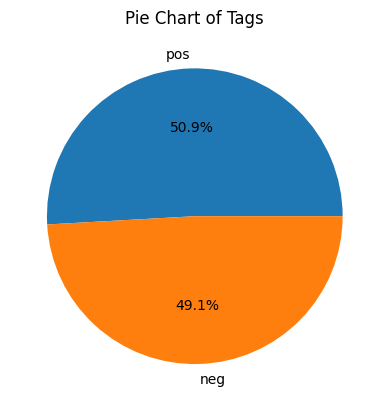

In [38]:
# pie chart of tags :
plt.pie(n_classes, labels=n_classes.index, autopct="%1.1f%%")
plt.title("Pie Chart of Tags")
plt.show()

In [39]:
# Find the minimum number of samples in any Tags:
min_samples = n_classes.min()
reviews = pd.concat([reviews[reviews['tag'] == label].sample(min_samples) for label in n_classes.index])
reviews['tag'].value_counts()


pos    31783
neg    31783
Name: tag, dtype: int64

In [40]:
#Lemmatisation
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
reviews['text'] = reviews['text'].astype(str)

lemmatizer = WordNetLemmatizer()
reviews['text'] = reviews['text'].apply(lambda text:lemmatizer.lemmatize(text))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
reviews['text'] .head()

3229     ['would', 'doubt', 'anyone', 'character', 'lik...
286      ['end', 'places', 'half', 'dozen', 'special', ...
8696     ['ok', 'lets', 'get', 'one', 'thing', 'straigh...
20782    ['relate', 'story', 'couple', 'liberated', 'lo...
21442    ['first', 'plot', 'revelations', 'foreseen', '...
Name: text, dtype: object

In [70]:
# SPLIT TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid=train_test_split(reviews['text'], reviews['tag'], test_size=0.2)

In [60]:
sentences = [sentence.split() for sentence in X_train]
embedding_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [71]:
import numpy as np

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [embedding_model.wv[word] for word in words if word in embedding_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_valid])

In [48]:
# Convert Tags  to numerical labels
label_encoder = LabelEncoder()
train_tag = label_encoder.fit_transform(y_train)
test_tag = label_encoder.transform(y_valid)

In [74]:
# Train a classifier (Random Forest in this example)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, train_tag)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(test_tag, predictions)
print(f'Accuracy of Random Forest: {accuracy:.2f}')

Accuracy of Random Forest: 0.50


In [76]:
from sklearn.linear_model import LogisticRegression
# Train a classification model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
# Make predictions on the test set
predictions2 = classifier.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(test_tag, predictions2)
print(f'Accuracy of LogisticRegression: {accuracy:.2f}')

Accuracy of LogisticRegression: 0.50
